In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import sklearn
from sklearn.preprocessing import Imputer
from sklearn.neighbors import NearestNeighbors 
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import check_array
sns.set_style('whitegrid')

In [3]:
file_name = './AP1/train_data/train_data/train_groundtruth/{}.csv'
df_list = []
for i in range(1, 11):
    df_list.append(pd.read_csv(file_name.format(i)))
df_truth = pd.concat(df_list)


In [17]:
file_name = './AP1/train_data/train_data/train_with_missing/{}.csv'
df_list = []
for i in range(1, 11):
    df_list.append(pd.read_csv(file_name.format(i)))
df_train = pd.concat(df_list)
df_train

,time,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,0,231.455136,7.065539,NaN,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,21.489706,52.592477,3.937804,202.422745
1,225,233.443180,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,21.489706,53.611339,3.937804,242.045839
2,800,229.467092,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,22.059795,54.630201,3.780817,261.064923
3,1515,225.491003,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,22.344839,49.535892,3.309856,199.252898
4,3013,231.455136,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,22.202317,34.252965,2.838896,188.158431
5,3746,231.455136,6.440948,44.786682,178.032126,NaN,NaN,158.888882,206.087034,15.528398,22.487361,30.177517,2.367935,192.913203
6,4434,229.467092,6.284800,46.440972,176.942885,62.114816,15.707409,158.888882,228.885147,16.042518,22.629883,30.177517,2.524922,NaN
7,4789,237.419269,7.065539,48.095262,183.478327,NaN,NaN,NaN,NaN,NaN,NaN,30.177517,2.681909,216.687059
8,6140,227.479047,6.128653,43.132392,178.032126,61.201089,15.042537,NaN,275.517651,15.656928,23.057450,NaN,2.367935,433.821611
9,7497,235.431225,7.221687,43.132392,181.299846,63.211287,15.973358,162.282522,NaN,14.885748,22.772405,30.177517,2.367935,210.347364


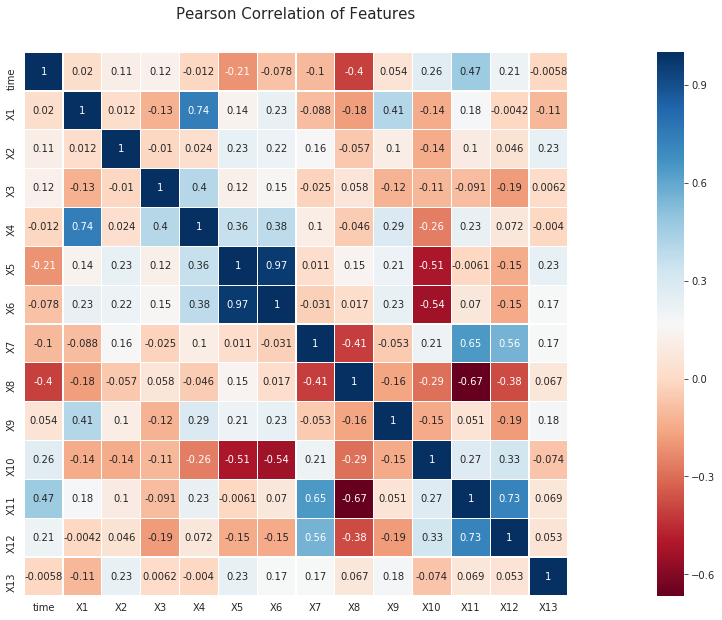

In [5]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

The proportion of entries with non-NaN values is 54.70%


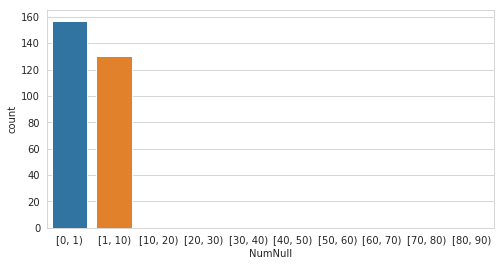

In [6]:
cons = df_train.iloc[0:, 5:]
cons['NumNull'] = cons.isnull().sum(axis=1)
print('The proportion of entries with non-NaN values is {:.2f}%'.format(len(cons[cons.NumNull==0])/len(cons)*100))
bins = [0,1,10,20,30,40,50,60,70,80,90]
cut = pd.cut(cons.NumNull, bins=bins, include_lowest=True, right=False)
fig, axis1 = plt.subplots(1,figsize=(8,4))
sns.countplot(x=cut, data=cut.to_frame(), ax=axis1)

plt.show()

In [7]:
print (df_train.isna().sum())
print (len(df_train))

time     0
X1      10
X2      10
X3      10
X4      10
X5      60
X6      73
X7      73
X8      70
X9      70
X10     73
X11     10
X12     10
X13     12
dtype: int64
287


In [8]:
from fancyimpute import KNN 

train_cols = list(df_train)
df_train = pd.DataFrame(KNN(k=5).fit_transform(df_train))
df_train.columns = train_cols

Imputing row 1/287 with 1 missing, elapsed time: 0.031
Imputing row 101/287 with 0 missing, elapsed time: 0.036
Imputing row 201/287 with 0 missing, elapsed time: 0.041


In [18]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df_train.values)


In [21]:
print (imputed_training[5])

[3.74600000e+03 2.31455136e+02 6.44094820e+00 4.47866818e+01
 1.78032126e+02 6.04448565e+01 1.55915903e+01 1.58888882e+02
 2.06087034e+02 1.55283977e+01 2.24873612e+01 3.01775172e+01
 2.36793508e+00 1.92913203e+02]


In [24]:
import datawig

df_trains, df_test = datawig.utils.random_split(df_train)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12'], # column(s) containing information about the column we want to impute
    output_column= 'X13', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2019-09-12 20:38:03,678 [INFO]  
========== start: fit model
2019-09-12 20:38:03,679 [WARNING]  Already bound, ignoring bind()
2019-09-12 20:38:03,712 [INFO]  Epoch[0] Batch [0-9]	Speed: 5964.47 samples/sec	cross-entropy=16.246883	X13-accuracy=0.800000
2019-09-12 20:38:03,735 [INFO]  Epoch[0] Train-cross-entropy=11.236105
2019-09-12 20:38:03,736 [INFO]  Epoch[0] Train-X13-accuracy=0.571429
2019-09-12 20:38:03,738 [INFO]  Epoch[0] Time cost=0.054
2019-09-12 20:38:03,745 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2019-09-12 20:38:03,755 [INFO]  Epoch[0] Validation-cross-entropy=186.081594
2019-09-12 20:38:03,759 [INFO]  Epoch[0] Validation-X13-accuracy=0.000000
2019-09-12 20:38:03,793 [INFO]  Epoch[1] Batch [0-9]	Speed: 6347.79 samples/sec	cross-entropy=11.875736	X13-accuracy=0.800000
2019-09-12 20:38:03,823 [INFO]  Epoch[1] Train-cross-entropy=9.318419
2019-09-12 20:38:03,827 [INFO]  Epoch[1] Train-X13-accuracy=0.571429
2019-09-12 20:38:03,832 [INFO]  Epoch[1] Time co